## Predict Delivery Time from Sorting Time 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-darkgrid')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
import statsmodels.formula.api as smf

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Understanding the Data

In [5]:
time = pd.read_csv('delivery_time.csv')

In [6]:
time.head(4)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9


In [7]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
time.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<AxesSubplot:>

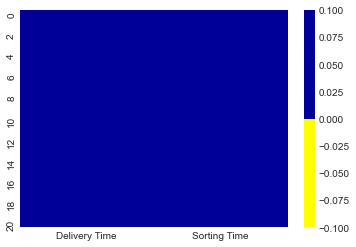

In [9]:
colors=['#ffff00','#000099']
sns.heatmap(time.isnull(),cmap=sns.color_palette(colors))

In [ ]:
# No Missing Values

In [10]:
# Check any duplicates
time[time.duplicated()].shape

(0, 2)

In [ ]:
# NO duplicates

Text(0.5, 1.0, 'Outliers checking for Delivery Time')

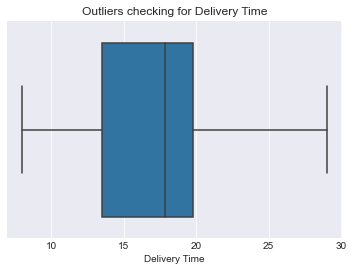

In [11]:
# Weither Any Outliers present

sns.boxplot(time['Delivery Time'])
plt.title('Outliers checking for Delivery Time')

Text(0.5, 1.0, 'Outliers checking for Sorting Time')

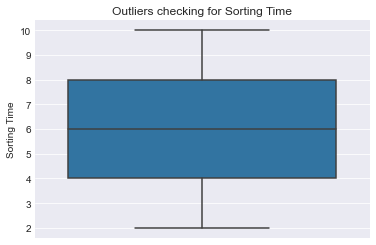

In [12]:
sns.boxplot(y=time['Sorting Time'])
plt.title('Outliers checking for Sorting Time')

In [ ]:
# No outliers in the data

### Step 1: Understanding the Linearity 

Text(0.5, 1.0, 'Predicting delivery time using sorting time')

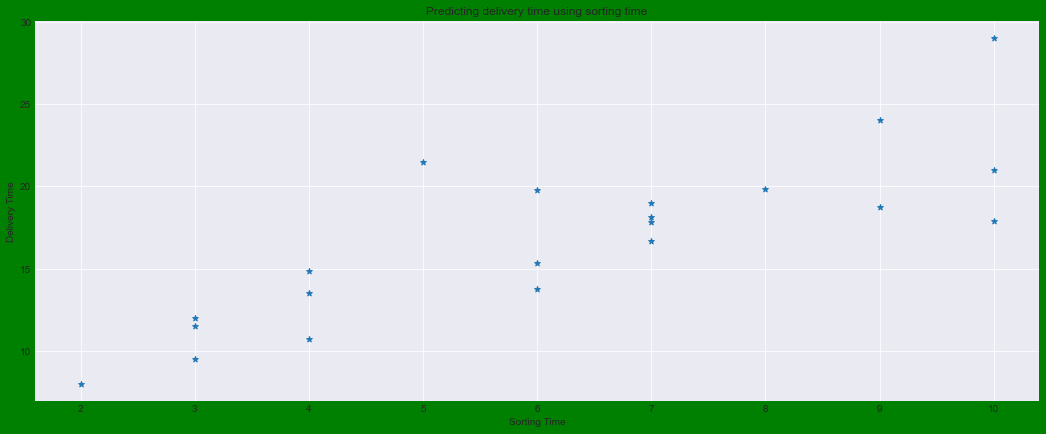

In [13]:
# Scatter plot

plt.figure(figsize=(18,7),facecolor='g')
plt.scatter(time['Sorting Time'],time['Delivery Time'],marker = '*')

plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Predicting delivery time using sorting time')

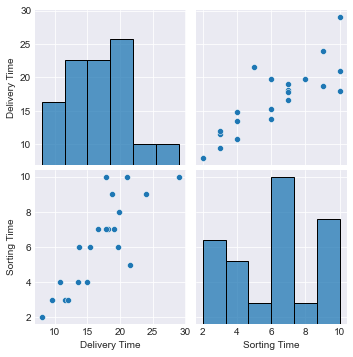

In [14]:
sns.pairplot(time)

In [15]:
time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
## there is Strong corelation between Delivery & Sorting Time , r=0.8259 > 0.8

<AxesSubplot:>

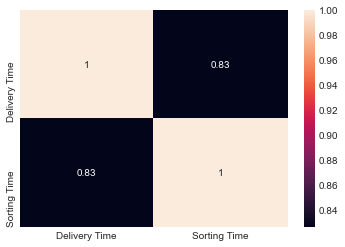

In [16]:
corrMatrics = time.corr()

sns.heatmap(corrMatrics,annot=True)


### Step 2 : Creating the Linear Model

In [17]:
time.shape

(21, 2)

In [18]:
lr=LinearRegression()

x = time['Sorting Time'].values.reshape(21,1) 
y = time['Delivery Time'].values.reshape(21,1) 


time_skl = lr.fit(x,y)

In [19]:
print(f'The LR line coefficient is - {time_skl.coef_}')
print(f'The LR Line intercept is - {time_skl.intercept_}')

The LR line coefficient is - [[1.6490199]]
The LR Line intercept is - [6.58273397]


In [20]:
# finding the predicted values

pred = time_skl.predict(x)
pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

Text(0.5, 1.0, 'Predicting Delivery Time from Sorting Time')

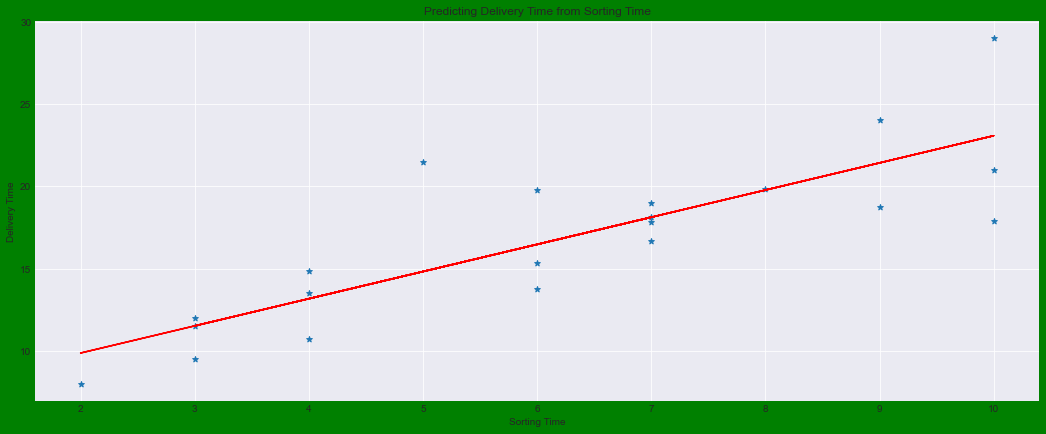

In [21]:
# lets Plot Scatter Plot with Regression Line - with help of (x,predicted y)

plt.figure(figsize=(18,7),facecolor='g')
plt.scatter(x,y,marker="*")

plt.plot(x,pred,color='r') #(x,y^)

plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Predicting Delivery Time from Sorting Time')

### Step 3: Model Fitness : How Good Model is?

In [22]:
r2score = r2_score(y,pred)
print('r2 Score is :',r2score)

r2 Score is : 0.6822714748417231


### Improving the R2 : Better Model

In [23]:
x1 = np.log(x)
y1=y

model1 = lr.fit(x1,y1)

print(f'The LR line coefficient is - {model1.coef_}')
print(f'The LR Line intercept is - {model1.intercept_}')

pred1 = model1.predict(x1)

r2score = r2_score(y1,pred1)
r2score

The LR line coefficient is - [[9.04341346]]
The LR Line intercept is - [1.15968351]


0.6954434611324223

In [24]:
x2 = np.log(x)
y2 = np.log(y)

model2 = lr.fit(x2,y2)

print(f'The LR line coefficient is - {model2.coef_}')
print(f'The LR Line intercept is - {model2.intercept_}')

pred2 = model2.predict(x2)

r2score = r2_score(y2,pred2)
r2score

The LR line coefficient is - [[0.59752233]]
The LR Line intercept is - [1.74198709]


0.77216134926874

In [25]:
x3 = np.log(x2)
y3 = np.log(y2)

model3 = lr.fit(x3,y3)

print(f'The LR line coefficient is - {model3.coef_}')
print(f'The LR Line intercept is - {model3.intercept_}')

pred3 = model3.predict(x3)

r2score = r2_score(y3,pred3)
r2score

The LR line coefficient is - [[0.33566048]]
The LR Line intercept is - [0.84469002]


0.8025094580937899

Text(0.5, 1.0, 'Predicting Delivery Time using Sorting Time')

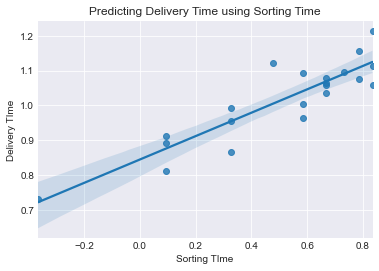

In [26]:
sns.regplot(x=x3,y=y3,fit_reg=True)

plt.ylabel('Delivery TIme')
plt.xlabel('Sorting TIme')
plt.title('Predicting Delivery Time using Sorting Time')